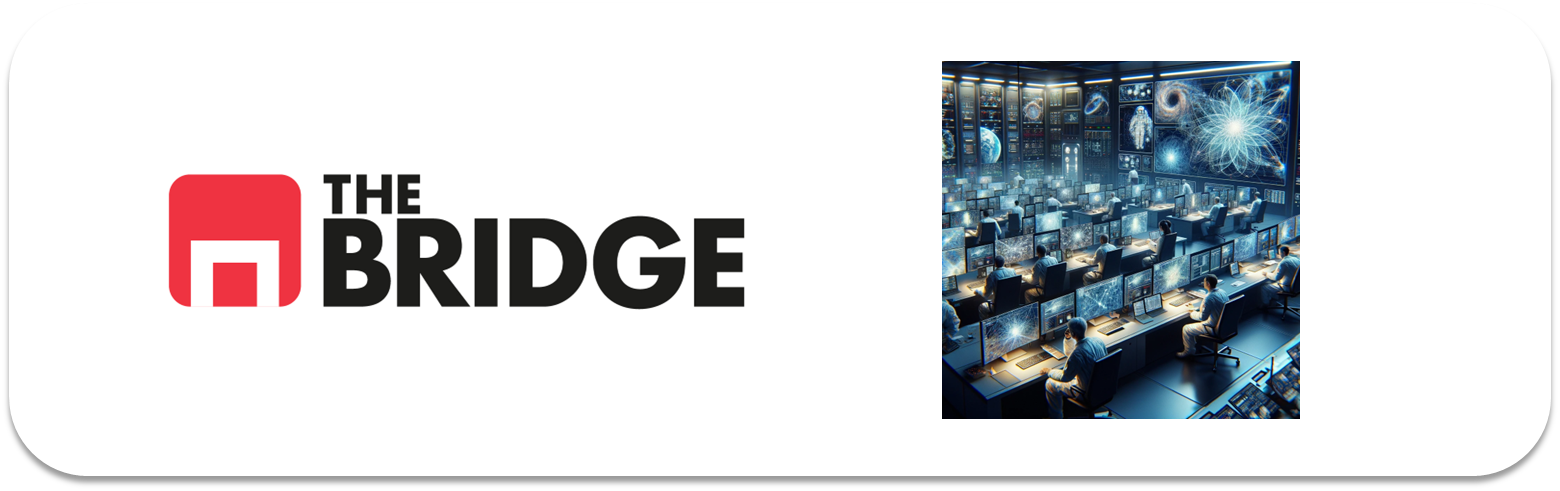

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

import warnings
# filter warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



In [2]:
# Leemos las imágenes y ponemos como clase su texto inicial

In [3]:
def read_data(directorio, reshape_dim = (32,32)):
    X = []
    y = []
    for file in os.listdir(directorio):
        image = plt.imread('/'.join([directorio, file]))
        image = cv2.resize(image, reshape_dim)
        X.append(image)
        y.append(str(file).split(".")[0])
    return X,y

In [4]:
X_train,y_train = read_data("data/train")


In [5]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [6]:
X_train.shape

(3990, 32, 32, 3)

In [7]:
# Son 3990 filas de dimension 32x32 y con 3 canales por cada fila. Vamos a ver que pinta tiene
X_train

array([[[[ 33,  37,  41],
         [ 38,  42,  40],
         [ 35,  43,  43],
         ...,
         [ 72,  79, 105],
         [ 91,  98, 124],
         [177, 174, 158]],

        [[ 37,  41,  44],
         [ 43,  48,  45],
         [ 38,  47,  46],
         ...,
         [ 75,  83, 102],
         [ 79,  87, 106],
         [179, 174, 150]],

        [[ 32,  41,  40],
         [ 36,  45,  44],
         [ 37,  46,  45],
         ...,
         [ 76,  86,  99],
         [ 73,  84,  91],
         [168, 161, 145]],

        ...,

        [[ 17,  17,  17],
         [ 15,  15,  15],
         [ 13,  13,  13],
         ...,
         [ 89,  75,  65],
         [ 84,  70,  59],
         [ 34,  19,  15]],

        [[ 24,  24,  24],
         [ 25,  25,  25],
         [ 25,  25,  25],
         ...,
         [ 72,  63,  56],
         [ 84,  75,  68],
         [ 97,  82,  77]],

        [[ 19,  17,  18],
         [ 20,  18,  19],
         [ 26,  25,  23],
         ...,
         [ 62,  45,  38],
        

In [8]:
y_train.shape

(3990,)

In [9]:
y_train

array(['cat', 'cat', 'cat', ..., 'dog', 'dog', 'dog'], dtype='<U3')

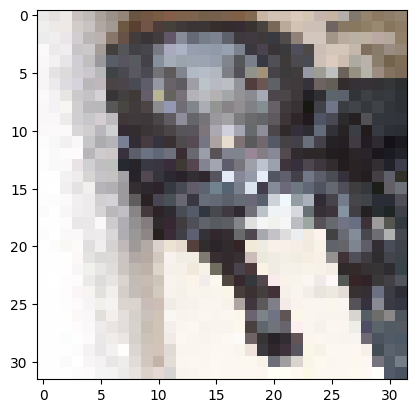

In [10]:
# Vamos a ver que pinta tiene una de estas imágenes
plt.imshow(X_train[2000])

<Axes: ylabel='Count'>

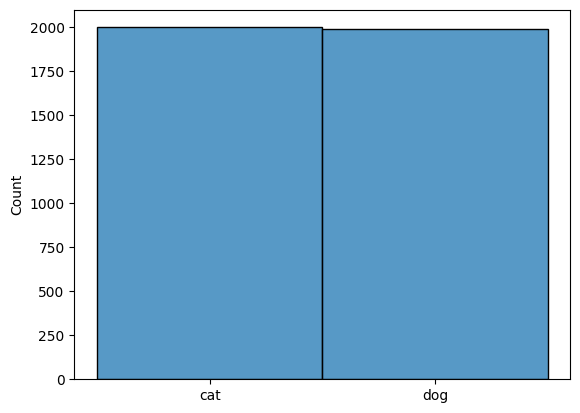

In [11]:
sns.histplot(y_train)

In [12]:
# Vemos que ambos tipos están bastante bien balanceados

In [13]:
# Escalamos los valores
X_train = X_train/255
X_train

array([[[[0.12941176, 0.14509804, 0.16078431],
         [0.14901961, 0.16470588, 0.15686275],
         [0.1372549 , 0.16862745, 0.16862745],
         ...,
         [0.28235294, 0.30980392, 0.41176471],
         [0.35686275, 0.38431373, 0.48627451],
         [0.69411765, 0.68235294, 0.61960784]],

        [[0.14509804, 0.16078431, 0.17254902],
         [0.16862745, 0.18823529, 0.17647059],
         [0.14901961, 0.18431373, 0.18039216],
         ...,
         [0.29411765, 0.3254902 , 0.4       ],
         [0.30980392, 0.34117647, 0.41568627],
         [0.70196078, 0.68235294, 0.58823529]],

        [[0.1254902 , 0.16078431, 0.15686275],
         [0.14117647, 0.17647059, 0.17254902],
         [0.14509804, 0.18039216, 0.17647059],
         ...,
         [0.29803922, 0.3372549 , 0.38823529],
         [0.28627451, 0.32941176, 0.35686275],
         [0.65882353, 0.63137255, 0.56862745]],

        ...,

        [[0.06666667, 0.06666667, 0.06666667],
         [0.05882353, 0.05882353, 0.05882353]

In [14]:
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train,random_state=42)

In [15]:
from keras.models import Sequential # importamos una construcción secuencial
model = Sequential() 


In [16]:
# Añadimos una capa convolucional
from keras.layers import Conv2D # Esta es la capa para convolucionales con entrada de 2 dimensiones con 3 canales

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,3))) 


In [17]:
# Añadimos una capa pool
from keras.layers import MaxPool2D 
model.add(MaxPool2D(pool_size=(2,2), strides = (2,2)))


In [18]:
# Añadimos nuestra capa dropout para que generalice mejor
from keras.layers import Dropout

model.add(Dropout(rate= 0.20)) # Mantenemos un ratio de un 25% de neuronas que se inutilizarán


In [19]:
# Añadimos nuestra segunda capa convolucional,nuestra segunda capa pool y nuestra segunda capa dropout
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

In [20]:
# Ahora metemos nuestra capa densa
from keras.layers import Flatten, Dense
# aplanamos nuestro modelo
model.add(Flatten())
# Añadimos nuestra capa densa con activación relu en esta capa oculta
model.add(Dense(256, activation = "relu"))
# Añadimos un dropout con un recorte en nuestras neuronas
model.add(Dropout(0.25))
# Añadimos una capa densa con 1 neurona para darnos nuestra salida de probabilidad
model.add(Dense(2, activation = "softmax"))

In [21]:
# Finalmente incluimos nuestro optimizador que inicialmente sera Adams
from keras.optimizers import Adam
optimizer = Adam(learning_rate =0.001, beta_1=0.9, beta_2=0.999) 

In [22]:
# Compilamos el modelo
model.compile(optimizer = optimizer , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 8)      │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,690 (1.01 MB)

 Trainable params: 264,690 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
condicion = y_train=="cat"
y_train[condicion] = 0
condicion = y_train=="dog"
y_train[condicion] = 1
y_train = y_train.astype(float)

In [25]:
y_train

array([0., 1., 0., ..., 0., 1., 1.])

In [26]:
# estimamos
from keras import callbacks
early_stopping_cb = callbacks.EarlyStopping(patience=20, restore_best_weights=True) # Esperamos 20 epoch antes de parar y guardamos los mejores pesos
history = model.fit(X_train, y_train, batch_size = 64, epochs= 100, validation_split=0.2, callbacks=early_stopping_cb)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4996 - loss: 0.7457 - val_accuracy: 0.5414 - val_loss: 0.6845
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5658 - loss: 0.6852 - val_accuracy: 0.5213 - val_loss: 0.6789
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5566 - loss: 0.6883 - val_accuracy: 0.5777 - val_loss: 0.6615
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5899 - loss: 0.6654 - val_accuracy: 0.6504 - val_loss: 0.6370
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6475 - loss: 0.6264 - val_accuracy: 0.6617 - val_loss: 0.6208
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6495 - loss: 0.6257 - val_accuracy: 0.6892 - val_loss: 0.5955
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6756 - loss: 0.5960 - val_accuracy: 0.6466 - val_loss: 0.6197
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6880 - loss: 0.5845 - val_accuracy: 0.688

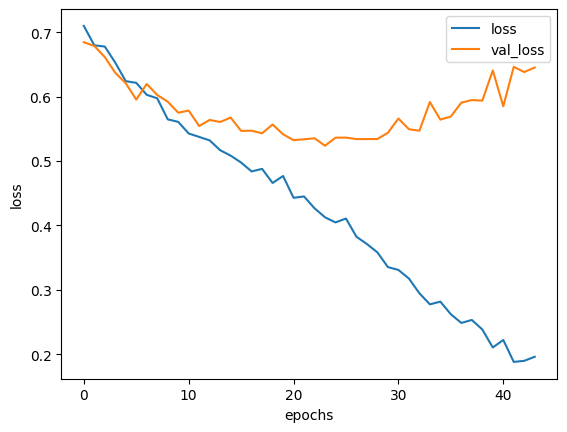

In [27]:
history_df = pd.DataFrame(history.history)
history_df[["loss","val_loss"]].plot();
plt.xlabel("epochs")
plt.ylabel("loss");

In [28]:
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.506266,0.709893,0.541353,0.684544
1,0.578947,0.679852,0.521303,0.678853
2,0.586779,0.677827,0.577694,0.661509
3,0.613722,0.652841,0.650376,0.637022
4,0.641604,0.624078,0.661654,0.620810
5,0.661967,0.621479,0.689223,0.595535
6,0.671992,0.602893,0.646617,0.619714
7,0.670113,0.597457,0.687970,0.602617
8,0.708333,0.564805,0.685464,0.592248
9,0.713972,0.560875,0.696742,0.575177


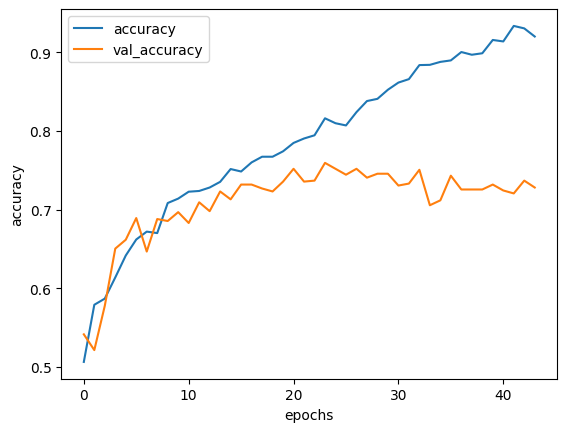

In [29]:
history_df = pd.DataFrame(history.history)
history_df[["accuracy","val_accuracy"]].plot();
plt.xlabel("epochs")
plt.ylabel("accuracy");

In [30]:
# Vamos ahora a evaluar el modelo
X_test,y_test = read_data("data/test")


In [31]:
X_test = np.array(X_test)

In [32]:
X_test = X_test/255
X_test

array([[[[0.76862745, 0.75686275, 0.68627451],
         [0.78039216, 0.76078431, 0.68627451],
         [0.76862745, 0.75294118, 0.67843137],
         ...,
         [0.70588235, 0.69019608, 0.64313725],
         [0.70980392, 0.69411765, 0.64705882],
         [0.70196078, 0.68627451, 0.63921569]],

        [[0.76470588, 0.74117647, 0.67843137],
         [0.78039216, 0.76078431, 0.69803922],
         [0.78039216, 0.75686275, 0.70980392],
         ...,
         [0.70980392, 0.69411765, 0.64705882],
         [0.70588235, 0.69803922, 0.61568627],
         [0.70588235, 0.69019608, 0.64313725]],

        [[0.8       , 0.77254902, 0.70980392],
         [0.81568627, 0.79607843, 0.71764706],
         [0.79607843, 0.77254902, 0.70980392],
         ...,
         [0.68235294, 0.67058824, 0.60392157],
         [0.6627451 , 0.64705882, 0.6       ],
         [0.65490196, 0.63921569, 0.59215686]],

        ...,

        [[0.85098039, 0.82745098, 0.77254902],
         [0.85490196, 0.83137255, 0.76862745]

In [33]:
y_test = np.array(y_test)

In [34]:
condicion = y_test=="cat"
y_test[condicion] = 0
condicion = y_test=="dog"
y_test[condicion] = 1
y_test = y_test.astype(float)

In [35]:
y_train

array([0., 1., 0., ..., 0., 1., 1.])

In [36]:
model.evaluate(X_test,y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7267 - loss: 0.5466


[0.5669842958450317, 0.7160000205039978]

In [37]:
y_pred = [np.argmax(prediction) for prediction in  model.predict(X_test)]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.74      0.72       500
         1.0       0.73      0.69      0.71       500

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000



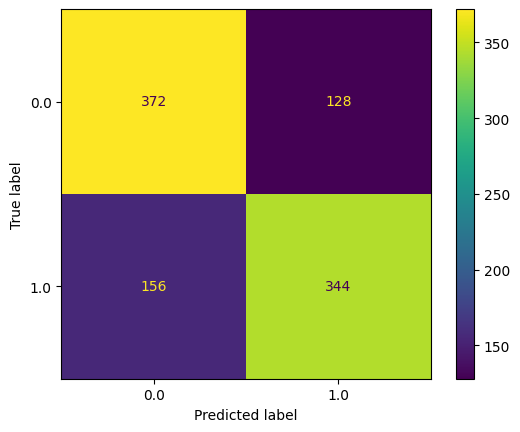

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [40]:
# No es un valor malo acertar en un 70% pero podría mejorarse.
# Vamos a obtener las probabilidades de cada imagen
y_pred_proba = [prediction for prediction in  model.predict(X_test)]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [41]:
# Vamos a guardar los datos de los que no se han acertado
gatos_mal = []
perros_mal = []
for valor_pred,valor_prob,valor_test,imagen in zip(y_pred,y_pred_proba,y_test,X_test):
    if valor_pred != valor_test:
        imagenv = []
        if valor_test == 0:
            imagenv.append(valor_prob[1])
            imagenv.append(imagen)
            perros_mal.append(imagenv)
        else:
            
            imagenv.append(valor_prob[0])
            imagenv.append(imagen)
            gatos_mal.append(imagenv)


In [42]:
# cojo los clasificados como perros incorrectamente
gatos_mal

[[0.5165048,
  array([[[0.17254902, 0.18823529, 0.18431373],
          [0.17254902, 0.21568627, 0.2       ],
          [0.2       , 0.24705882, 0.23137255],
          ...,
          [0.25490196, 0.2627451 , 0.25882353],
          [0.28235294, 0.29019608, 0.28627451],
          [0.30196078, 0.30980392, 0.30980392]],
  
         [[0.15686275, 0.18823529, 0.19607843],
          [0.18431373, 0.20392157, 0.20392157],
          [0.19607843, 0.23529412, 0.22352941],
          ...,
          [0.27843137, 0.27843137, 0.2745098 ],
          [0.2745098 , 0.28235294, 0.2627451 ],
          [0.31764706, 0.3254902 , 0.3254902 ]],
  
         [[0.16470588, 0.20392157, 0.20392157],
          [0.18039216, 0.19607843, 0.2       ],
          [0.16862745, 0.21176471, 0.19607843],
          ...,
          [0.08235294, 0.12156863, 0.12941176],
          [0.27058824, 0.2745098 , 0.28627451],
          [0.2745098 , 0.28235294, 0.27843137]],
  
         ...,
  
         [[0.20392157, 0.21568627, 0.21176471],
 

In [43]:
gatos_mal = pd.DataFrame(gatos_mal)

In [44]:
gatos_mal

,0,1
0,0.516505,"[[[0.17254901960784313, 0.18823529411764706, 0..."
1,0.711267,"[[[0.08235294117647059, 0.09411764705882353, 0..."
2,0.657206,"[[[0.4470588235294118, 0.3607843137254902, 0.2..."
3,0.816897,"[[[0.08627450980392157, 0.08627450980392157, 0..."
4,0.614721,"[[[0.043137254901960784, 0.047058823529411764,..."
...,...,...
151,0.725148,"[[[0.11764705882352941, 0.11764705882352941, 0..."
152,0.811511,"[[[0.8509803921568627, 0.7843137254901961, 0.7..."
153,0.565248,"[[[0.6901960784313725, 0.8862745098039215, 1.0..."
154,0.806840,"[[[0.03529411764705882, 0.0392156862745098, 0...."


In [45]:
# Vemos cuantas serían el 10%
fotos = 10*len(gatos_mal)//100

In [46]:
gatos_mal.sort_values(0,ascending=False)[0:fotos]

,0,1
62,0.991704,"[[[0.09411764705882353, 0.03137254901960784, 0..."
11,0.975332,"[[[0.043137254901960784, 0.058823529411764705,..."
52,0.968843,"[[[0.9215686274509803, 0.9254901960784314, 0.9..."
127,0.968708,"[[[0.13725490196078433, 0.2235294117647059, 0...."
135,0.966216,"[[[0.00392156862745098, 0.396078431372549, 0.7..."
8,0.960893,"[[[0.17254901960784313, 0.20784313725490197, 0..."
10,0.954892,"[[[0.34901960784313724, 0.396078431372549, 0.3..."
38,0.953639,"[[[0.054901960784313725, 0.06274509803921569, ..."
75,0.944836,"[[[1.0, 1.0, 1.0], [0.984313725490196, 0.98431..."
74,0.924220,"[[[0.6352941176470588, 0.4980392156862745, 0.3..."


In [47]:
# Hacemos lo mismo con los perros
perros_mal = pd.DataFrame(perros_mal)

In [48]:
perros_mal

,0,1
0,0.525170,"[[[0.33725490196078434, 0.3568627450980392, 0...."
1,0.840167,"[[[0.15294117647058825, 0.45098039215686275, 0..."
2,0.774092,"[[[0.11764705882352941, 0.14901960784313725, 0..."
3,0.860760,"[[[0.6823529411764706, 0.6980392156862745, 0.6..."
4,0.872383,"[[[0.3686274509803922, 0.3333333333333333, 0.3..."
...,...,...
123,0.814883,"[[[0.3607843137254902, 0.36470588235294116, 0...."
124,0.664554,"[[[0.9215686274509803, 0.8901960784313725, 0.8..."
125,0.711410,"[[[0.09411764705882353, 0.06274509803921569, 0..."
126,0.631461,"[[[0.1803921568627451, 0.17647058823529413, 0...."


In [49]:
# Vemos cuantas serían el 10%
fotos = 10*len(perros_mal)//100

In [50]:
perros_mal.sort_values(0,ascending=False)[0:fotos]

,0,1
89,0.998690,"[[[0.09803921568627451, 0.26666666666666666, 0..."
95,0.975709,"[[[0.6901960784313725, 0.6313725490196078, 0.5..."
51,0.953781,"[[[0.08235294117647059, 0.10588235294117647, 0..."
28,0.945535,"[[[0.8745098039215686, 0.8196078431372549, 0.7..."
8,0.907673,"[[[0.7490196078431373, 0.6823529411764706, 0.6..."
73,0.890041,"[[[0.24313725490196078, 0.2549019607843137, 0...."
111,0.889116,"[[[0.6431372549019608, 0.5176470588235295, 0.4..."
118,0.888524,"[[[0.7333333333333333, 0.7333333333333333, 0.4..."
5,0.884043,"[[[0.4823529411764706, 0.6705882352941176, 0.4..."
43,0.883191,"[[[0.8, 0.8313725490196079, 0.8431372549019608..."


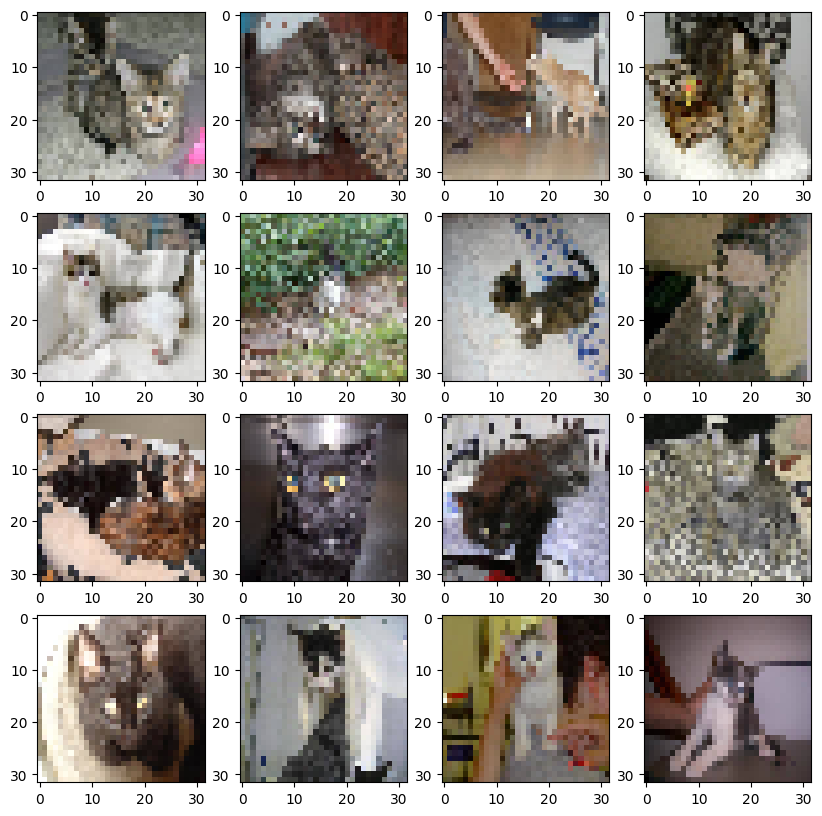

In [51]:
# Las vamos a mostrar ahora. Muestro los gatos clasificados como perros

fig, axes = plt.subplots(4,4,figsize=(10,10))
posicion = 0
for fila in range(0,4):
    for columna in range(0,4):
        imagen = perros_mal.iloc[posicion][1]
        axes[fila,columna].imshow(imagen)
        posicion += 1
fig.show()

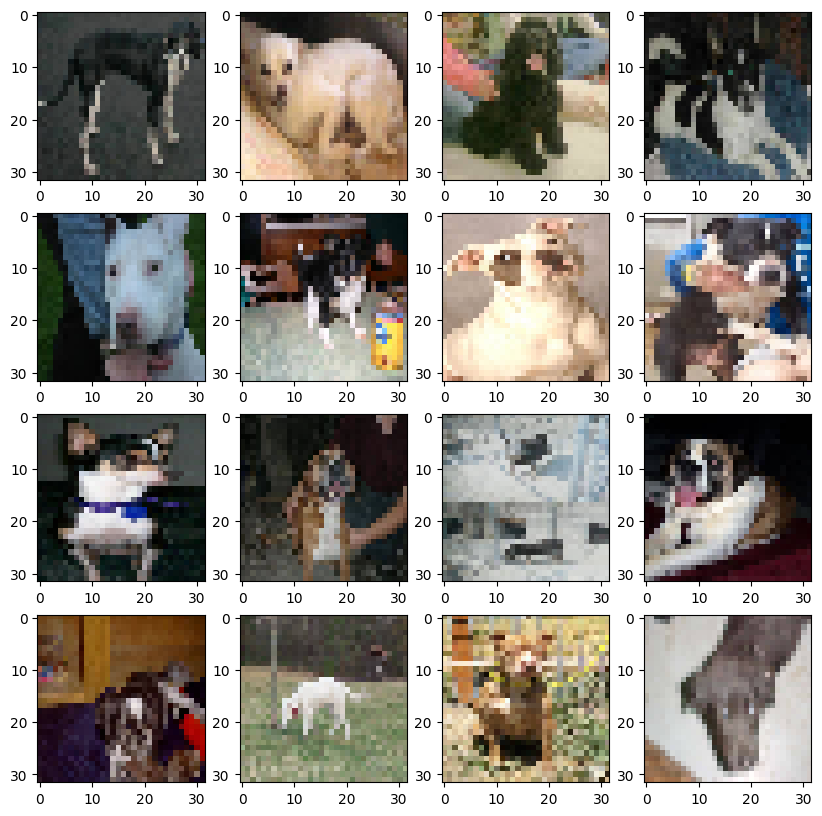

In [52]:
# Muestro los perros clasificados como gatos

fig, axes = plt.subplots(4,4,figsize=(10,10))
posicion = 0
for fila in range(0,4):
    for columna in range(0,4):
        imagen = gatos_mal.iloc[posicion][1]
        axes[fila,columna].imshow(imagen)
        posicion += 1
fig.show()

In [53]:
# Vamos a ver que dice de la imagen "Perro_test.jpg"
image = plt.imread('./perro_test.jpg')
image = cv2.resize(image, (32,32))
image = image/255
X=np.array([image])
y_pred_nueva = [np.argmax(prediction) for prediction in  model.predict(X)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [54]:
y_pred_nueva

[1]

In [55]:
# Vemos que ha clasificado correctamente. Vamos a ver que dice de la imagen "Gato_test.jpg"
image = plt.imread('./gato_test.jpg')
image = cv2.resize(image, (32,32))
image = image/255
X=np.array([image])
y_pred_nueva = [np.argmax(prediction) for prediction in  model.predict(X)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [56]:
y_pred_nueva

[0]

In [ ]:
# Tambien ha clasificado correctamente